# Análisis de regresión logística

In [4]:
# Instala dependencias
!pip install pingouin
!pip install pyreadstat
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase15_BaseRegresionLogistica.sav

# Ejercicio

Un grupo de investigadores e investigadoras esperan que el estrés la ansiedad y la sintomatología de depresión contribuyan positivamente en los problemas de sueño de trabajadores médicos hospitalarios.

HT: El estrés, la ansiedad y depresión contribuyen a los problemas de sueño de las/los trabajadores médicos de hospital
- $H_{0}$: $β_{estres} = β_{ansiedad} = β_{depresion} = 0$
- $H_{1}$: $β_{estres} > β_{ansiedad} > β_{depresion} > 0$

Ecuación del modelo de regresión logística:

Logit (problemas de sueño) = $β_{0} - β_{estres} + β_{ansiedad} + β_{depresion}$ 

## Visualización de datos

In [11]:
import pandas as pd

df = pd.read_spss("Clase15_BaseRegresionLogistica.sav")
dict_map = {"Sí": 1, "No": 0}
df["ProbSueño"] = df["ProbSueño"].map(dict_map)
df

,Código,Sexo,Edad,ProbSueño,Estrés,Ansiedad,Depresión
0,001,Mujer,40.0,1,5.0,7.0,3.0
1,002,Hombre,26.0,1,8.0,6.0,1.0
2,003,Hombre,19.0,0,2.0,3.0,1.0
3,004,Hombre,35.0,0,2.0,1.0,2.0
4,005,Hombre,35.0,0,8.0,2.0,5.0
...,...,...,...,...,...,...,...
95,096,Mujer,29.0,1,6.0,6.0,3.0
96,097,Mujer,39.0,0,6.0,4.0,0.0
97,098,Mujer,43.0,1,7.0,12.0,11.0
98,099,Hombre,30.0,1,7.0,14.0,9.0


## Ajuste del modelo

In [12]:
import statsmodels.formula.api as smf

model = smf.logit("ProbSueño ~ Estrés + Ansiedad + Depresión", data=df).fit()
model.summary()

ValueError: endog has evaluated to an array with multiple columns that has shape (100, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

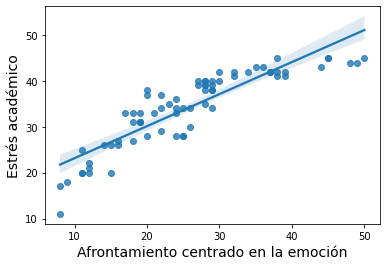

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.regplot(x="Afroemoción", y="Estrés_académico", data=df)
ax.set_xlabel("Afrontamiento centrado en la emoción", size=14)
ax.set_ylabel("Estrés académico", size=14)
plt.show()

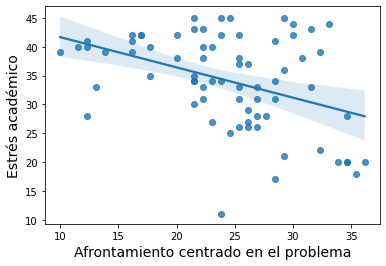

In [4]:
ax = sns.regplot(x="Afroproblema", y="Estrés_académico", data=df)
ax.set_xlabel("Afrontamiento centrado en el problema", size=14)
ax.set_ylabel("Estrés académico", size=14)
plt.show()

## Verificación de supuestos

### Evaluar normalidad de distribuciones

In [6]:
import pingouin as pg

pg.normality(
    data=df[["Estrés_académico", "Afroemoción", "Afroproblema"]],
    method="shapiro",
)

,W,pval,normal
Estrés_académico,0.935916,0.001187,False
Afroemoción,0.971221,0.097621,True
Afroproblema,0.974104,0.143369,True


In [7]:
df["Estrés_académico"].skew()

-0.7121524804706215

In [8]:
df["Estrés_académico"].kurt()

-0.20869314603309919

El análisis de normalidad indica que las distribuciones de afrontamiento centrado en el problema, SW = .974, p = .143, y de afrontamiento centrado en la emoción, SW = .971, p = .098, son normales. Si bien la distribución de estrés académico no es normal, SW = .936, p = .001, de acuerdo a la asimetría y curtosis estandarizadas se puede considerar no problemática, por lo que se usará el índice de correlación paramétrico de Pearson.

https://www.ibm.com/support/pages/node/421769

## Evaluar evidencia de relación

In [12]:
pg.pairwise_corr(
    columns=["Estrés_académico", "Afroemoción", "Afroproblema"],
    method="pearson",
    data=df,
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Estrés_académico,Afroemoción,pearson,two-sided,72,0.887956,"[0.83, 0.93]",2.607112e-25,1.339e+22,1.000000
1,Estrés_académico,Afroproblema,pearson,two-sided,72,-0.409051,"[-0.59, -0.2]",3.602602e-04,75.185,0.952645
2,Afroemoción,Afroproblema,pearson,two-sided,72,-0.297336,"[-0.49, -0.07]",1.119772e-02,3.444,0.726518


Los resultados del análisis de correlación muestran una relación estadísticamente significativa, negativa y mediana, según el criterio de Cohen (1988), entre afrontamiento centrado en el problema y estrés académico, r(70) = -.41, p < .001 (unilateral).

A su vez, se observa una relación estadísticamente significativa, positiva y grande, según el criterio de Cohen (1988), entre afrontamiento centrado en la emoción y estrés académico, r(70) = .89, p< .001 (unilateral).

Así, se cumple con el supuesto de linealidad entre las variables de estudio.

## Análisis del modelo

In [14]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Fit regression model
model = smf.ols("Estrés_académico ~ Afroemoción + Afroproblema", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Estrés_académico   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           9.89e-26
Time:                        22:04:58   Log-Likelihood:                -192.18
No. Observations:                  72   AIC:                             390.4
Df Residuals:                      69   BIC:                             397.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.0876      2.335      9.461      0.000      17.430      26.745
Afroemoción      0.6613      0.043     15.358      0.000       0.575       0.747
Afroproblema    -0.2041      0.070     -2.907      0.005      -0.344      -0.064
==============================================================================
Omnibus:                        3.613   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                3.012
Skew:                          -0.293   Prob(JB):                        0.222
Kurtosis:                       3.812   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Verificación de supuestos

### Normalidad de residuos

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

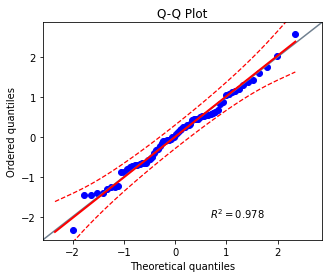

In [15]:
import pingouin as pg

pg.qqplot(model.resid)

In [16]:
pg.normality(data=model.resid, method="shapiro")

,W,pval,normal
0,0.984891,0.543076,True


La prueba de Shapiro-Wilk fue de SW = .985, p = .543, por lo que se puede decir que los residuos del modelo presentan distribución normal.

### Independencia o no multicolinealidad

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = model.model.exog

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = model.params.index

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(X, i) for i in range(model.model.exog.shape[1])
]
vif_data

,feature,VIF
0,Intercept,30.857202
1,Afroemoción,1.096982
2,Afroproblema,1.096982


- Afrontamiento centrado en problemas: Tolerancia = .91 (> .20), VIF = 1.10 (< 3)
- Afrontamiento centrado en emoción:    Tolerancia = .91 (> .20), VIF = 1.10  (< 3)

Los resultados sugieren que ambas variables predictoras, afrontamiento centrado en el problema y centrado en la emoción, no tienen una relación lineal entre sí, por lo que se cumple con el supuesto de independencia de variables.


## Evaluación del modelo de regresión

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Estrés_académico   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           9.89e-26
Time:                        22:28:20   Log-Likelihood:                -192.18
No. Observations:                  72   AIC:                             390.4
Df Residuals:                      69   BIC:                             397.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.0876      2.335      9.461      0.000      17.430      26.745
Afroemoción      0.6613      0.043     15.358      0.000       0.575       0.747
Afroproblema    -0.2041      0.070     -2.907      0.005      -0.344      -0.064
==============================================================================
Omnibus:                        3.613   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                3.012
Skew:                          -0.293   Prob(JB):                        0.222
Kurtosis:                       3.812   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El coeficiente de determinación ajustado fue R2= .806, es decir, el 80.6% de la variación que se observa en estrés académico es explicado por el afrontamiento centrado en el problema y el centrado en la emoción. Según el criterio de Cohen (1988) el R2 es grande.

El resultado del análisis ANOVA fue F(2,69) = 148.56, p < .001, por lo que se puede decir que el modelo es adecuado. Al menos una de las VI es un predictor significativo del estrés académico.

El análisis de regresión lineal múltiple indica que el $β_{0}=22.09$, $β_{afront.problema}= -0.204$, $p=.002$ (unilateral) y $β_{afront.emoción}=0.661$, $p<.001$ (unilateral). 

En el caso del afrontamiento centrado en el problema se encontró que predice de manera inversa y significativa al estrés académico. A cada incremento de una unidad en afrontamiento problema se observa una disminución de 0.204 en estrés académico.

Por su parte, el afrontamiento centrado en la emoción predice de manera directa y significativa al estrés académico. Por cada unidad adicional de afrontamiento emoción, se observa un aumento de 0.661 en estrés académico. Por todo ello se concluye que se cumple la HT de las investigadoras.

Estrés académico = 22.09 - 0.204(afrontamiento problema) + 0.661(afrontamiento emoción) + 3.57

In [36]:
import numpy as np
from scipy import stats

model = smf.ols(
    "Estrés_académico ~ Afroemoción + Afroproblema",
    data=df.select_dtypes(include=[np.number]).dropna().apply(stats.zscore),
).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Estrés_académico   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           9.89e-26
Time:                        22:57:59   Log-Likelihood:                -42.084
No. Observations:                  72   AIC:                             90.17
Df Residuals:                      69   BIC:                             97.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.227e-16      0.052   6.17e-15      1.000      -0.104       0.104
Afroemoción      0.8407      0.055     15.358      0.000       0.731       0.950
Afroproblema    -0.1591      0.055     -2.907      0.005      -0.268      -0.050
==============================================================================
Omnibus:                        3.613   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                3.012
Skew:                          -0.293   Prob(JB):                        0.222
Kurtosis:                       3.812   Cond. No.                         1.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De acuerdo a los betas estandarizados, el afrontamiento centrado en la emoción es más importante que el afrontamiento centrado en el problema en el modelo de predicción del estrés académico. 

$β_{afront.emoción} = .841 > β_{afront.problema} = .159$ 